In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
data = pd.read_csv('IRIS.csv')
print(data.describe())
print(data.shape)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
(150, 5)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [2]:
data = pd.read_csv('IRIS.csv')
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
data.tail()

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = load_iris()
x =data.data
y=iris.target

In [21]:
data = pd.DataFrame(x, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
data['species'] = y
data['species'] = data['species'].map({0: 'setosa',1: 'versicolor',2: 'virginica'})

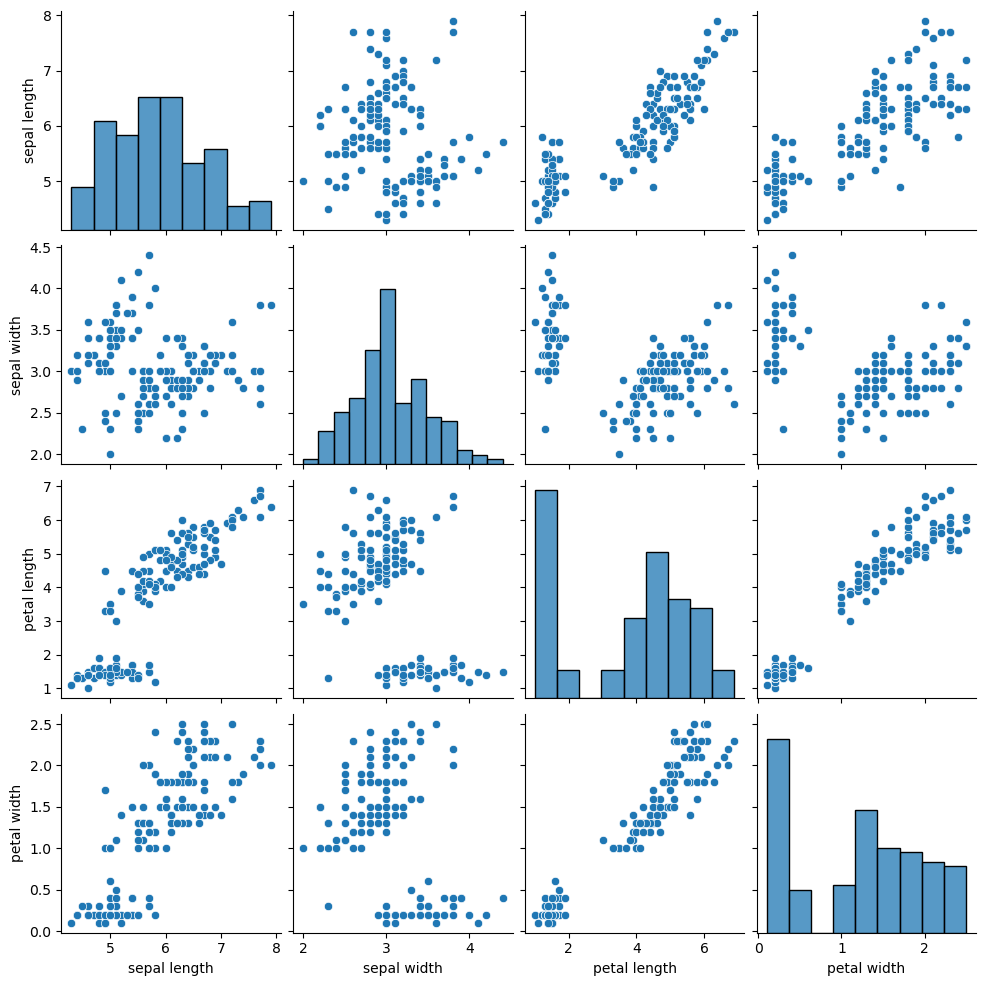

In [22]:
sns.pairplot(data)
plt.show()

In [26]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

In [27]:
print(x)
print(y)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [32]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [35]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [36]:
x_test_prediction = model.predict(x_test)
print(x_test_prediction)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [38]:
y_test_prediction = model.predict(x_test)

In [43]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object

In [47]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [48]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:",test_accuracy)

Training Accuracy: 0.9666666666666667
Test Accuracy: 1.0


In [51]:
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print("Training Classification Report:\n", report_train)
print("\nTest Classification Report:\n", report_test)

Training Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.93      0.95        41
   virginica       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


Test Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

